In [78]:
from __future__ import absolute_import, division, print_function, unicode_literals
# keras y tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


In [0]:
# Descarga de los datos
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [0]:
(train_images.shape,train_labels.shape)

((60000, 28, 28), (60000,))

In [0]:
print("Número de clases:", np.sort(pd.Series(train_labels).unique()))

Número de clases: [0 1 2 3 4 5 6 7 8 9]


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

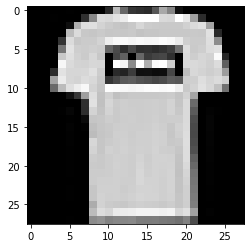

In [0]:
plt.figure()
plt.imshow(train_images[1],cmap='gray')
plt.show()

In [0]:
# Reescalado de datos (0 a 1)
train_images = train_images / 255.0
test_images = test_images/255.0

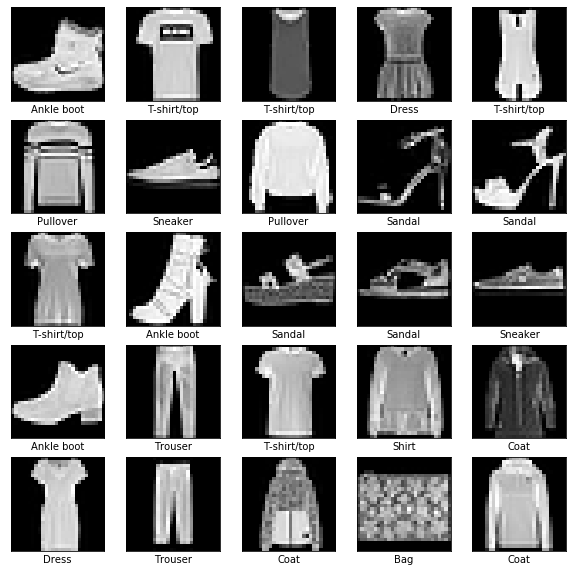

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap='gray')
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

In [0]:
m = 20
n = 20
ch = 3
num_classes = 10

In [0]:
model = Sequential()
model.add(Conv2D(
    16,
    (3,3),
    strides=(1,1),
    activation='relu',
    input_shape=(m,n,ch)))
model.add(MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2)
))
#model.add(Conv2D(
#    32,
#    (3,3),
#    strides=(1,1),
#    activation='relu'))
#model.add(MaxPooling2D(
#    pool_size=(2,2),
#    strides=(2,2)))
model.add(Dense(100,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

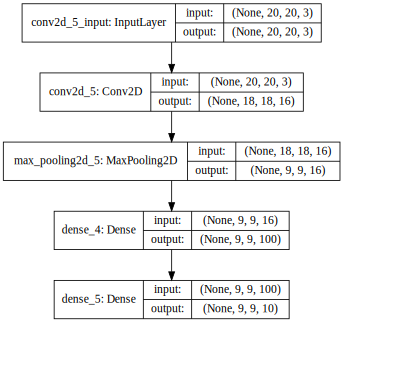

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes=True,show_layer_names=True,dpi=60).create(prog='dot',format='svg'))

In [0]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [0]:
model.fit(train_images,train_labels,epochs=5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5




60000/60000 [==============================] - 8s 126us/step - loss: 0.4885 - acc: 0.8263
Epoch 2/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.3714 - acc: 0.8653
Epoch 3/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.3326 - acc: 0.8777
Epoch 4/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.3129 - acc: 0.8856
Epoch 5/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.2905 - acc: 0.8932


In [0]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('Test accuracy',test_acc)

10000/10000 [==============================] - 0s 31us/step
Test accuracy 0.8762


In [0]:
train_loss,train_acc = model.evaluate(train_images,train_labels)
print('Train accuracy',train_acc)

60000/60000 [==============================] - 2s 26us/step
Train accuracy 0.9020166666666667


In [0]:
predictions = model.predict(test_images)

In [0]:
predictions[0]

array([2.0150314e-05, 7.3024779e-08, 2.2219972e-07, 2.4821889e-08,
       3.3165932e-07, 4.0319942e-02, 1.1190034e-06, 6.0772754e-02,
       3.9355955e-06, 8.9888144e-01], dtype=float32)

In [0]:
np.argmax(predictions[0])

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

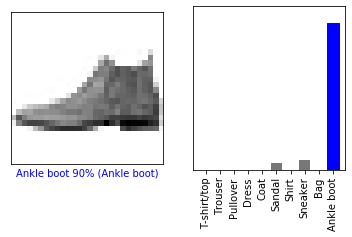

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.xticks(list(range(10)),class_names,rotation=90)
plt.show()

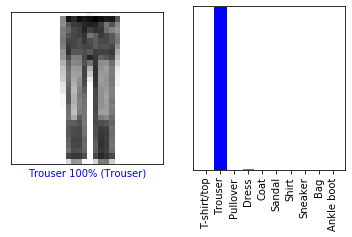

In [0]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.xticks(list(range(10)),class_names,rotation=90)
plt.show()

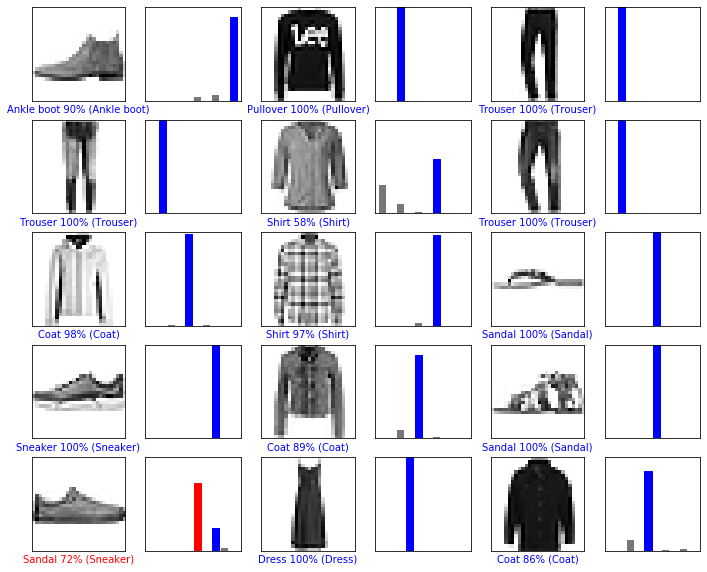

In [0]:
# Graficar las primeras 15 predicciones
# poner las predicciones acertadas en azul y las erroneas en rojo
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.show()

In [0]:
from keras.layers.convolutional import Conv2D

In [0]:
model = Sequential()

# Convolution 2D
model.add(
    Conv2D(32,kernel_size=(3,3),
           activation='relu',
           kernel_initializer='he_normal',
           input_shape=(28,28,1)
           )
)
model.add(MaxPooling2D((2,2)))
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))

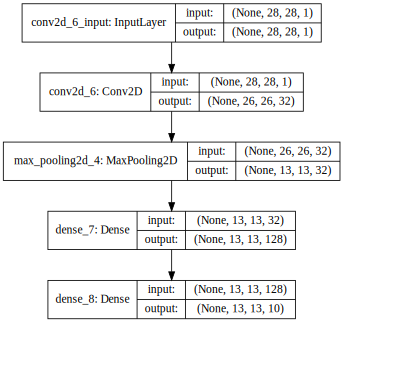

In [82]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes=True,show_layer_names=True,dpi=60).create(prog='dot',format='svg'))

In [107]:
import glob
images = glob.glob(local_download_path + '/*.jpg')

NameError: ignored